# COVID-19 Pandemic Report
##Corona Virus is transmit from one person to other through the way of direct transmission of salaiva(Such Sneezing). And this virus to more affective and kills the low immuned people and in recnt days WHO(World Health Roganization)

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [92]:
df=pd.read_csv(r'C:\Users\Afranzio\Desktop\Corona Virus Uptodate\novel-corona-virus-04-05-20\covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [93]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     10914
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [94]:
df['Province/State']=df["Province/State"].fillna('Unkown')

In [95]:
df["Country/Region"].replace('Mainland China','China',inplace=True)

In [96]:
df[["Confirmed","Recovered","Deaths"]]=df[["Confirmed","Recovered","Deaths"]].astype(int)
df["Last Update"]=pd.to_datetime(df["Last Update"])
df["ObservationDate"]=pd.to_datetime(df["ObservationDate"])
df['Active']=df['Confirmed']-df['Deaths']-df['Recovered']
df.drop(df[df['Active'] < 0].index, inplace = True)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,China,2020-01-22 17:00:00,1,0,0,1
1,2,2020-01-22,Beijing,China,2020-01-22 17:00:00,14,0,0,14
2,3,2020-01-22,Chongqing,China,2020-01-22 17:00:00,6,0,0,6
3,4,2020-01-22,Fujian,China,2020-01-22 17:00:00,1,0,0,1
4,5,2020-01-22,Gansu,China,2020-01-22 17:00:00,0,0,0,0


In [97]:
Data = df[df['ObservationDate'] == max(df['ObservationDate'])].reset_index()

In [98]:
data=Data.groupby(["ObservationDate"])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
data

,ObservationDate,Confirmed,Deaths,Recovered,Active
0,2020-05-03,3506729,247470,920163,2339096


In [99]:
lable=['Deaths','Recovered','Active']
value=data.iloc[0,2:]
fig=px.pie(data,values=value,names=lable,color_discrete_sequence=['royalblue','lightblue','darkblue'])
fig.update_layout(title='Total Effect Result')
print('Total Number of cases :' , data['Confirmed'].max())
fig.show()

Total Number of cases : 3506729


In [100]:
Data_per_country = df.groupby(["Country/Region"])["Confirmed"].max().reset_index().sort_values("Confirmed",ascending=False).reset_index(drop=True)
Data_per_country.head(10)

,Country/Region,Confirmed
0,US,316415
1,Spain,236899
2,Italy,210717
3,UK,186599
4,France,167605
5,Germany,165664
6,Russia,134687
7,Turkey,126045
8,Brazil,101826
9,Iran,97424


In [101]:
fig=go.Figure(data=[go.Scatter(x=Data_per_country['Country/Region'].head(10),
                               y=Data_per_country['Confirmed'].head(10),   mode='markers',
                               marker=dict(
                               color=[145,140,135,130,125,120,115,110,105,100],
                               size=[120,110,100,90,80,70,60,50,40,35],
                               showscale=True 
                               ))])
fig.update_layout(title='Top 10 infected Countries')
fig.show()

In [102]:
fig=go.Figure(data=[go.Bar(x=Data_per_country["Country/Region"].head(10),y=Data_per_country["Confirmed"].head(10),
                           text=Data_per_country["Country/Region"].head(10),marker_color="Royalblue",textposition='auto')])
fig.update_layout(title='Top 10 Country Shows Confirmed')
fig.show()

# Top Active_Cases in World

In [103]:
Active_per_country=df.groupby("Country/Region")['Active'].max().reset_index().sort_values('Active',ascending=False).reset_index()

In [104]:
Active_per_country.head(10)

,index,Country/Region,Active
0,207,US,291707
1,206,UK,158153
2,167,Russia,116768
3,102,Italy,108257
4,187,Spain,105149
5,71,France,98073
6,205,Turkey,80808
7,77,Germany,72864
8,27,Brazil,51784
9,43,China,50633


In [105]:
fig=go.Figure(data=[go.Bar(x=Active_per_country['Country/Region'].head(10),y=Active_per_country['Active'].head(10),
                           text=Active_per_country['Country/Region'].head(10),textposition='auto',marker_color='black')])
fig.update_layout(title='Top 10 Countries with Acive Cases')
fig.show()

In [106]:
fig=go.Figure(data=[go.Scatter(x=Active_per_country['Country/Region'].head(10),y=Active_per_country['Active'].head(10),
                               mode='markers',
                              marker=dict(color=[145,140,135,130,125,120,115,110,105,100],
                                         size=[120,110,100,90,80,70,60,50,40,35],
                                         showscale=True))])
fig.update_layout(title='Top 10 Countries with Acive Cases')
fig.show()

Text(0.5, 1.0, 'Top 10 Countries with Acive Cases')

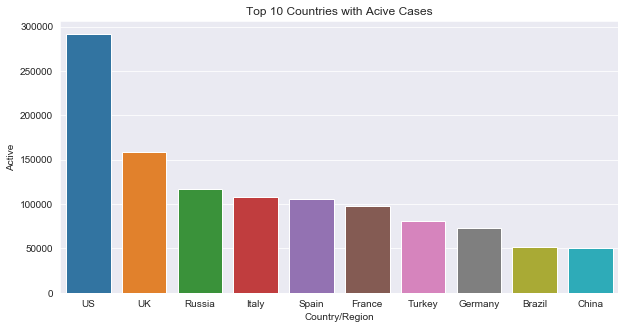

In [107]:
sns.barplot(x=Active_per_country['Country/Region'].head(10),y=Active_per_country['Active'].head(10))
plt.rcParams['figure.figsize']=10,5
plt.title('Top 10 Countries with Acive Cases')

In [108]:
Deaths_per_country=df.groupby("Country/Region")['Deaths'].max().reset_index().sort_values('Deaths',ascending=False).reset_index()

In [109]:
Deaths_per_country.head(10)

,index,Country/Region,Deaths
0,102,Italy,28884
1,206,UK,28446
2,187,Spain,25264
3,71,France,24864
4,207,US,24708
5,20,Belgium,7844
6,27,Brazil,7051
7,77,Germany,6866
8,98,Iran,6203
9,142,Netherlands,5056


In [110]:
fig=go.Figure(data=[go.Bar(x=Deaths_per_country['Country/Region'].head(10),y=Deaths_per_country['Deaths'].head(10),
                           marker_color='grey',text=Deaths_per_country['Country/Region'].head(10),textposition='auto',)])
fig.update_layout(title='Top 10 Countries with Dead Cases')
fig.show()


# Italy's Situation berif

In [111]:
data=df[df['Country/Region']=='Italy'].tail(1).reset_index()
data

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,20978,20979,2020-05-03,Unkown,Italy,2020-05-04 02:32:28,210717,28884,81654,100179


In [112]:
labels=['Deaths','Recovered','Active']
values=data.iloc[0,7:]
fig=px.pie(data,values=values,names=labels,color_discrete_sequence=['red','green','royalblue'],title='Current Situation In Italy',hole=0.5)
fig.show()

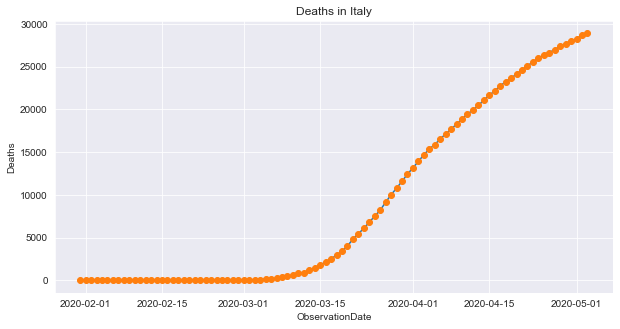

In [113]:
Italy=df[df['Country/Region']=='Italy'].reset_index()
sns.set_style('darkgrid')
sns.lineplot(data=Italy,x='ObservationDate',y='Deaths')
plt.plot_date(data=Italy,x='ObservationDate',y='Deaths')
dth=Italy['Deaths'].max()
plt.title('Deaths in Italy')
plt.rcParams['figure.figsize']=10,5

The Deaths state in Italy is show its gradually getting raise..

Text(0.5, 1.0, "America's Corona Cases Plot::")

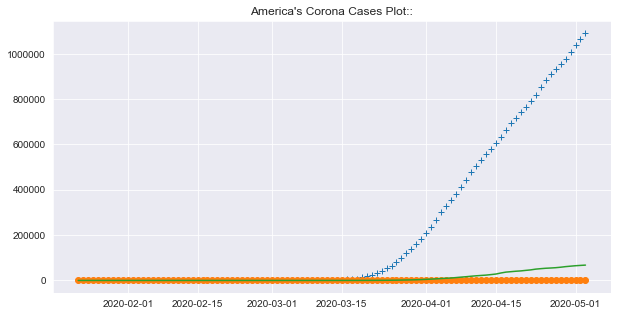

In [114]:
America=df[df['Country/Region']=='US'].reset_index()
America['Active']=America['Confirmed']-America['Deaths']-America['Recovered']
USD=America.groupby(America['ObservationDate'])[['Confirmed','Active','Recovered','Deaths']].sum().reset_index()
plt.plot_date(USD['ObservationDate'],USD['Active'],fmt='+')
plt.plot_date(USD['ObservationDate'],USD['Recovered'])
plt.plot_date(USD['ObservationDate'],USD['Deaths'],fmt='-')
plt.title('America\'s Corona Cases Plot::')

America started to record their highest number of corona cases.
This plot is shows full corona affects for first date in America

In [115]:
China=df[df['Country/Region']=='China']
china_confirmed=China.groupby(['ObservationDate'])['Confirmed'].sum().reset_index()

In [116]:
Us=df[df['Country/Region']=='US']
us_confirmed=Us.groupby(['ObservationDate'])['Confirmed'].sum().reset_index()

In [117]:
italy=df[df['Country/Region']=='Italy']
Italy_confirmed=italy.groupby(['ObservationDate'])['Confirmed'].sum().reset_index()

In [118]:
india=df[df['Country/Region']=='India']
India_confirmed=india.groupby(['ObservationDate'])['Confirmed'].sum().reset_index()

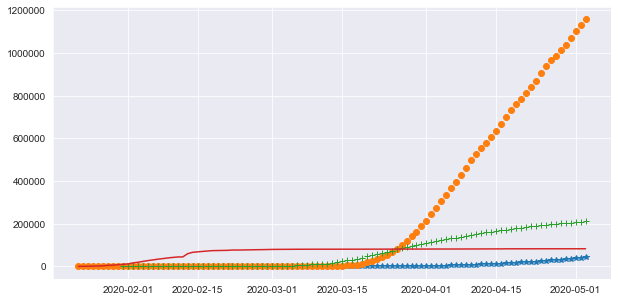

In [119]:
plt.plot_date(India_confirmed['ObservationDate'],India_confirmed['Confirmed'],fmt='*')
plt.plot_date(us_confirmed['ObservationDate'],us_confirmed['Confirmed'])
plt.plot_date(Italy_confirmed['ObservationDate'],Italy_confirmed['Confirmed'],fmt='+')
plt.plot_date(china_confirmed['ObservationDate'],china_confirmed['Confirmed'],fmt='-')

Last 60 day status of confirmation in India,US,Italy,China. This plot shows that in this last 60 days the china is standard in a state and remains fine but Italy and US is reported largest number of confirmation...

Total Number Of Cases: 42505


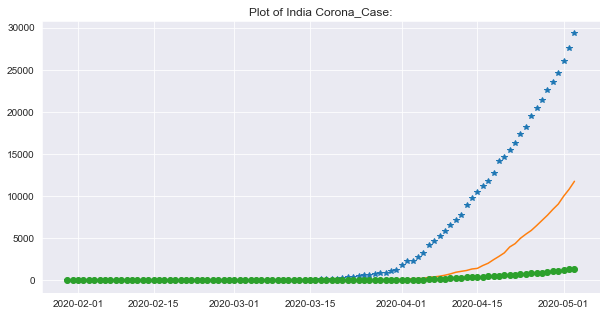

In [120]:
india=df[df['Country/Region']=='India']
India=india[['ObservationDate','Confirmed','Active','Recovered','Deaths']]
plt.plot_date(x='ObservationDate',y='Active',data=India,fmt='*')
plt.plot_date(x='ObservationDate',y='Recovered',data=India,fmt='-')
plt.plot_date(x='ObservationDate',y='Deaths',data=India)
plt.title('Plot of India Corona_Case:')
print("Total Number Of Cases:",India['Confirmed'].max())

Text(0.5, 1.0, 'Confirmation Graph of INDIA')

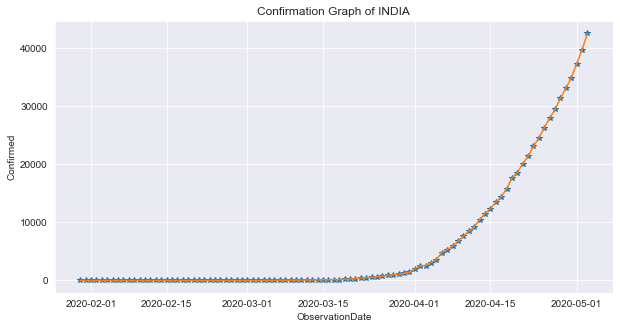

In [121]:
plt.plot_date(India_confirmed['ObservationDate'],India_confirmed['Confirmed'],fmt='*')
sns.lineplot(data=India,x='ObservationDate',y='Confirmed')
plt.title('Confirmation Graph of INDIA')

In [122]:
value=India.iloc[:,2:].max()
label=['Active','Recovered','Deaths']
fig=px.pie(values=value,labels=label,names=label,hole=0.5,title='Total Corona Cases In India')
fig.show()

This Graph Shows that India started to report its confirmations to raising State..

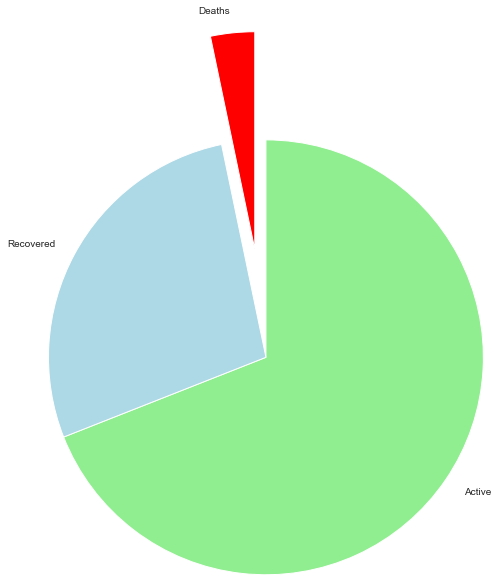

In [123]:
plt.pie(x=value,startangle=90,labels=label,radius=2,explode=[0,0,1],counterclock=False,colors=["lightgreen","lightblue","red"]);

#Compare then other countries India reports its starting stage of corona pandemic..
#And India Confirmation report is starts to raise Gradually...